Group Members:
Ch. Siddharth (BCD21)
K Sri Chaitan (BCD38)
K Karthik Raj (BCD41)


# **Objective** **Function** (**abs_function**):

The function to be minimized is f(x1, x2) = |x1| + 2|x2|. This function is non-differentiable at the origin but has subgradients which are used in subgradient descent.

# **Subgradient** (**abs_subgradient**):

The subgradient is computed for the absolute value function at each point. For x1 and x2, the subgradient is either 1, -1, or a random value between -1 and 1 (or -2 and 2) when the respective variable is zero.

# **Optimization** **Methods**:

Constant Step Size: A fixed step size (0.8) is used for all iterations.
Diminishing Step Size: The step size starts at 0.8 and diminishes after each iteration according to the rule:
alpha = alpha / (1.5^0.7).

# **Visualization**:

The optimization paths for both methods are plotted on top of the contour plot of the objective function. The red circles represent the path taken with a constant step size, while the green crosses represent the path with a diminishing step size.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#**Define** **the** **Objective** **Function**
This function represents the non-differentiable objective function to be minimized:
f(x1, x2) = |x1| + 2|x2|.

# **Explanation**:

The function has a "V" shape which is non-differentiable at the origin,
but we use subgradients to approximate the gradient direction for optimization.


In [4]:
# Define the absolute value function
def abs_function(point):
    x1, x2 = point
    return abs(x1) + 2 * abs(x2)

# **Define** **the** **Subgradient** **Function**
This function calculates the subgradient of the objective function at a given point.
# **Explanation**:

The subgradient is 1 or -1 depending on the sign of the variable.
If x1 or x2 is zero, a random value within a specific range is chosen to account for non-differentiability.



In [5]:
# Define the subgradient of the absolute value function
def abs_subgradient(point):
    x1, x2 = point
    grad_x1 = np.random.uniform(-1, 1) if x1 == 0 else (1 if x1 > 0 else -1)
    grad_x2 = np.random.uniform(-2, 2) if x2 == 0 else (2 if x2 > 0 else -2)
    return np.array([grad_x1, grad_x2])

# **Prepare** **Contour** **Grid** **for** **Visualization**
 We create a grid of points over a specified range to compute the function's values for visualization.
# **Explanation**:

This grid will help us visualize contour lines representing function values across the x1-x2 plane.


In [6]:

# Create a grid of points for plotting the function's contour
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = np.vectorize(lambda x, y: abs_function([x, y]))(X, Y)



# **Initialize** **Starting** **Point** **and** **Parameters**

Setting up the initial point and parameters for subgradient descent.
# **Explanation**:

The initial position is the starting point for optimization.
Two methods are used: one with a constant step size and another with a diminishing step size.

Parameters are set accordingly for both.


In [7]:
# Initialize the starting point for the optimization
initial_position = np.array([3.0, 4.0])

# Parameters for step sizes and number of iterations
constant_step_size = 0.1  # Constant step size
positions_const = [initial_position.copy()]
positions_dim = [initial_position.copy()]
i_iterations = 1000  # Number of iterations

# Initializing step size for diminishing method
alpha_0 = 0.1
p = 0.5  # Chosen p value in (0, 1) for diminishing step size



# **Subgradient** **Descent** with Constant Step Size
#**Explanation**:
 This loop performs subgradient descent using a constant step size of 0.1.
 The algorithm updates the current position by moving in the direction opposite to the subgradient.


In [8]:
# Constant step size optimization (subgradient descent)
current_pos_const = initial_position.copy()
for _ in range(i_iterations):
    grad_const = abs_subgradient(current_pos_const)
    current_pos_const = current_pos_const - constant_step_size * grad_const
    positions_const.append(current_pos_const.copy())

# Subgradient Descent with Diminishing Step Size
**bold text**
# Explanation:

 This loop performs subgradient descent using a diminishing step size.
 The step size reduces at each iteration according to step_size = alpha_0 / (i ** p).
 This helps to stabilize and improve convergence in the optimization process.


In [9]:
# Diminishing step size optimization (subgradient descent)
current_pos_dim = initial_position.copy()
for i in range(1, i_iterations + 1):
    grad_dim = abs_subgradient(current_pos_dim)
    step_size = alpha_0 / (i ** p)  # Diminishing step size with p=0.5
    current_pos_dim = current_pos_dim - step_size * grad_dim
    positions_dim.append(current_pos_dim.copy())

# Plot the Contours and Optimization Paths
# Explanation:
 Generate a contour plot of the function overlaid with paths of the optimization methods.
 - Red circles show the path taken by the constant step size method.
 - Green crosses show the path taken by the diminishing step size method.


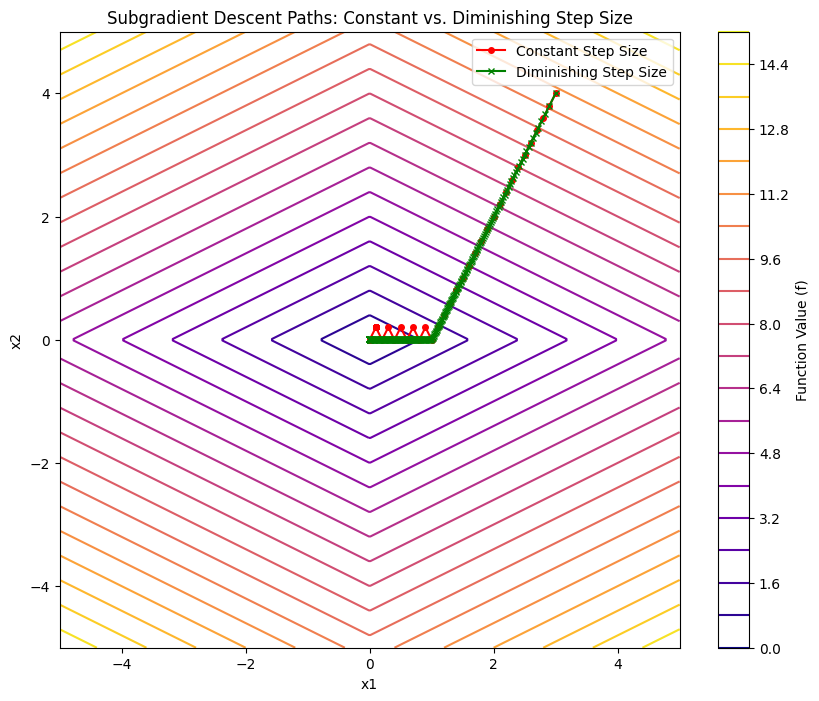

In [10]:
# Plotting the results
plt.figure(figsize=(10, 8))

# Plot contour of the absolute value function
plt.contour(X, Y, Z, levels=20, cmap='plasma')
plt.colorbar(label="Function Value (f)")

# Plot the paths of the optimization methods
plt.plot(*zip(*positions_const), marker='o', color='red', markersize=4, label='Constant Step Size')
plt.plot(*zip(*positions_dim), marker='x', color='green', markersize=4, label='Diminishing Step Size')

# Set plot labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Subgradient Descent Paths: Constant vs. Diminishing Step Size')

# Show the plot
plt.show()

# Output
The plot shows the optimization paths for both constant and diminishing step sizes.



# Done by
Chitikesi Siddharth (2022BCD0021)







---

